# CEE 598: Uncertainty Quantification
## Assignment Two
### Noah Garfinkle (garfink2@illinois edu)
### 13 February 2020

# Imports and Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Problem 1

Using inverse transform sampling, write a code that can be used to generate n samples from the Cauchy distribution.  The Cauchy PDF and CDF are given by

$$
f_X\left(x\right)=\frac{1}{\pi\gamma\left[1+\left(\frac{x-x_0}{\gamma}\right)^2\right]}
$$

$$
F_X\left(x\right)=\frac{1}{\pi}\arctan{\left(\frac{x-x_0}{\gamma}\right)}+\frac{1}{2}
$$

Where $x_o$ is the median, and $\gamma$ is a scale factor.  The inputs to your code should be the number of samples $n$, and the numerical values for $x_0$ and $\gamma$.  Compute the generated samples with the target PDF, for a particular choice of $x_0$ and $\gamma$ (you’re free to choose any value).  You can use histogram plots or any available kernel density estimator codes.  Discuss your results.

In [2]:
x0 = 0
γ = 2

In [3]:
def pdf(x,x0=0,γ=2):
    f_denom = np.pi * γ * (1 + np.power((x-x0)/γ,2))
    f = 1.0 / f_denom
    return f

In [4]:
def cdf(x,x0=0,γ=2):
    F = (1/np.pi) * np.arctan((x-x0)/γ) + 1/2
    return F

In [5]:
def testPDF(x,x0=0,γ=2):
    f = stats.cauchy.pdf(x=x, loc=x0, scale=γ)
    return f

In [6]:
def testCDF(x,x0=0,γ=2):
    F = stats.cauchy.cdf(x=x, loc=x0, scale=γ)
    return F

Solve for the inverse of the CDF

$$
y=\frac{1}{\pi}\arctan{\left(\frac{x-x_0}{\gamma}\right)}+\frac{1}{2}
$$
$$
y-\frac{1}{2}=\frac{1}{\pi}\arctan{\left(\frac{x-x_0}{\gamma}\right)}
$$
$$
\pi y-\frac{1}{2}\pi=\arctan{\left(\frac{x-x_0}{\gamma}\right)}
$$
$$
\tan{\left(y\pi-\frac{1}{2}\pi\right)}=\frac{x-x_0}{\gamma}
$$
$$
\gamma tan{\left(y\pi-\frac{1}{2}\pi\right)}=x-x_0
$$
$$
x=\gamma tan{\left(y\pi-\frac{1}{2}\pi\right)}+x_0\rightarrow Inverse\ CDF
$$

In [7]:
def inverseCDF(P,x0=0.0,γ=2.0):
    P = float(P)
    x0 = float(x0)
    γ = float(γ)
    x = γ*np.tan(P*np.pi-(1/2)*np.pi) + x0
    return x

In [8]:
def cauchy(n,x0=0,γ=2):
    inverseCDFXs = []
    for i in range(0,n):
        u = np.random.uniform()
        inverseCDFXs.append(inverseCDF(u,x0,γ))
    return inverseCDFXs

In [9]:
def plotController(x0=0.0,γ=2.0,n=10000,xMin=0.0,xMax=10.0,linSpaceIntervals=100):
    xs = np.linspace(xMin,xMax,linSpaceIntervals)
    fs = [pdf(x,x0,γ) for x in xs]
    testfs = [testPDF(x,x0,γ) for x in xs]

    Fs = [cdf(x,x0,γ) for x in xs]
    testFs = [testCDF(x,x0,γ) for x in xs]

    fig,ax = plt.subplots(2,2,figsize=(20,20))
    ax[0,0].plot(xs,fs,label="My PDF", alpha=0.5)
    ax[0,0].fill_between(xs,testfs,hatch='x',facecolor="white",label="Numpy PDF")

    ax[0,1].plot(xs,Fs,label="My CDF", alpha=0.5)
    ax[0,1].fill_between(xs,testFs,hatch='+',facecolor="white",label="Numpy CDF",alpha=0.5)

    ax[0,0].set_title(f"PDF Test: x0:{x0}, γ={γ}")
    ax[0,1].set_title(f"CDF Test: x0:{x0}, γ={γ}")

    ax[0,0].set_xlabel("x")
    ax[0,0].set_ylabel("P")

    ax[0,1].set_xlabel("x")
    ax[0,1].set_ylabel("P")

    ax[0,0].legend()
    ax[0,1].legend()
    
    Ps = np.linspace(0.01,0.99,100)
    inverseXs = [inverseCDF(P,x0,γ) for P in Ps]
    ax[1,0].plot(inverseXs,Ps,label="Inverse CDF")
    ax[1,0].legend()
    ax[1,0].set_title(f"Inverse CDF: x0:{x0}, γ={γ}")
    
    c = cauchy(n,x0=x0,γ=γ)
    testC = stats.cauchy.rvs(size=n, loc=x0, scale=γ)
    
    # compare two distributions
    # https://stats.stackexchange.com/questions/354035/how-to-compare-the-data-distribution-of-2-datasets
    ksTest = stats.ks_2samp(c,testC)
    
    # do a direct kstest too
    # https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html
    ksTest_Direct = stats.kstest(c,"cauchy",(x0,γ))
    
    sns.kdeplot(c,ax=ax[1,1],label="My Generator",alpha=0.5)
    sns.kdeplot(testC,ax=ax[1,1],label="Numpy Generator",alpha=0.5)
    ax[1,1].legend()
    ax[1,1].set_title(f"Comparison of Implemented and Numpy Cauchy Random Number Generator\nx0:{x0}, γ={γ}\nKolmogorov-Smirnov Test: Statistic-{ksTest.statistic:,.3f},pValue-{ksTest.pvalue:,.3}\nKolmogorov-Smirnov Test Against Distribution Name: Statistic-{ksTest_Direct.statistic:,.3f},pValue-{ksTest_Direct.pvalue:,.3}\nμ={np.mean(c)}")

In [10]:
interact(plotController,
         x0=widgets.FloatSlider(min=-10,max=10,step=0.5,value=0),
         γ=widgets.FloatSlider(min=1,max=10,step=0.1,value=1),
         n=widgets.IntSlider(min=10000,max=1000000,step=10000,value=100000),
         xMin=widgets.IntSlider(min=-100,max=100,step=1,value=0),
         xMax=widgets.IntSlider(min=-90,max=110,step=1,value=10),
         linSpaceIntervals=widgets.IntSlider(min=100,max=10000,step=100,value=100)
        )

interactive(children=(FloatSlider(value=0.0, description='x0', max=10.0, min=-10.0, step=0.5), FloatSlider(val…

<function __main__.plotController(x0=0.0, γ=2.0, n=10000, xMin=0.0, xMax=10.0, linSpaceIntervals=100)>

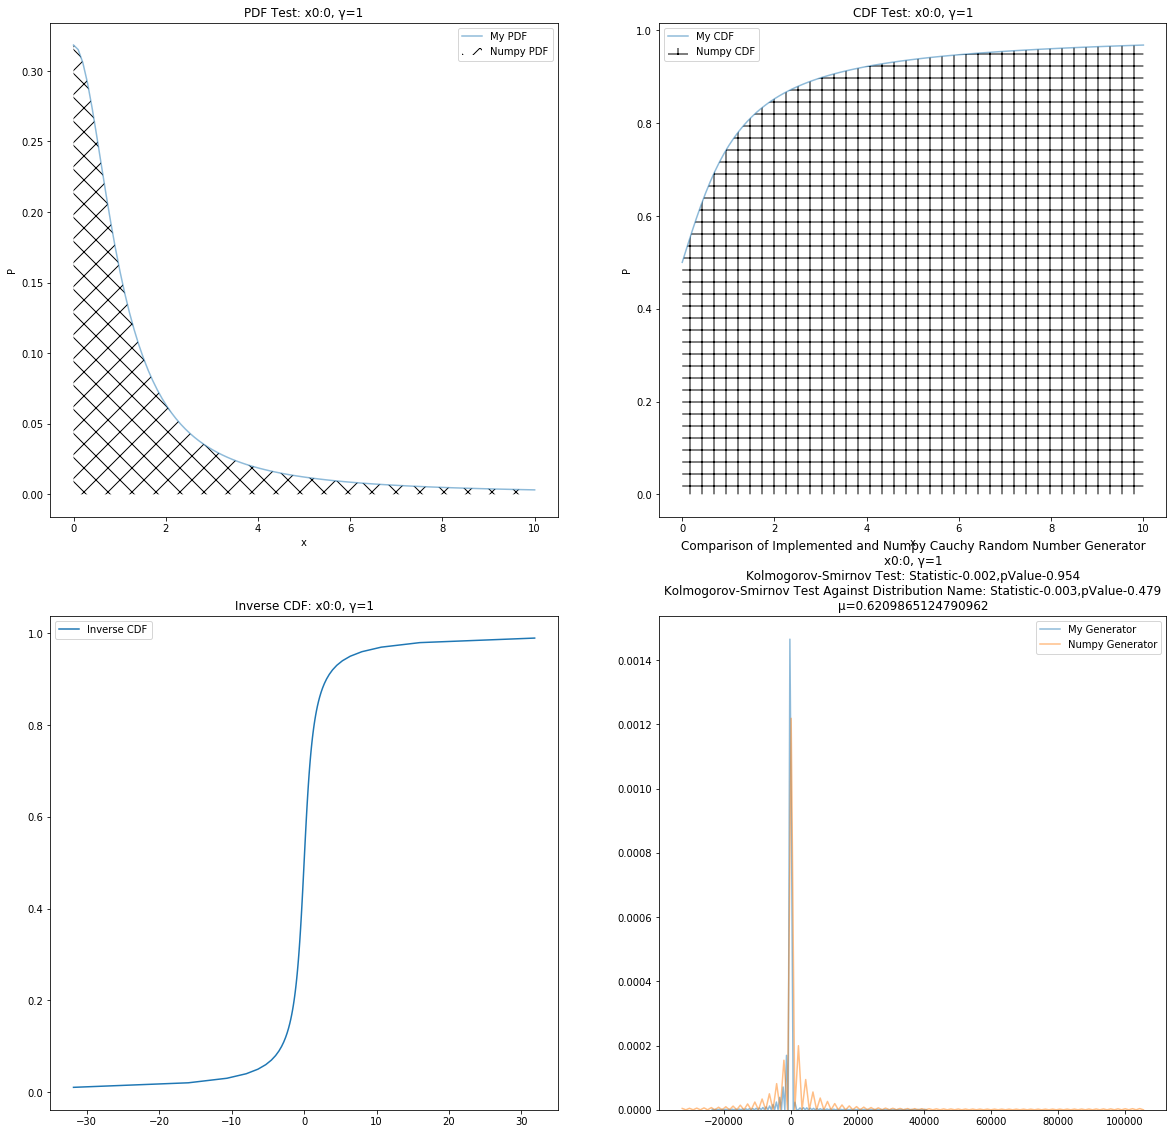

In [90]:
plotController(x0=0,γ=1,n=100000,xMin=0,xMax=10,linSpaceIntervals=100)

# Problem 2

You are asked to provide a random number generator from the Gamma PDF, $Gamma(x;2,2)$, given by

$$
f_X\left(x\right)=\frac{1}{4}xe^{-\frac{x}{2}}
$$

You are supposed to use rejection sampling, and choose the envelope PDF, i.e. $cg(x)$, to be a scaled version of Cauchy PDF (given in Problem 1).

In [11]:
def gammaPDF(x):
    f = 1/4 * x * np.exp(-x/2)
    return f

## Problem 2.1

Show how you modify your Cauchy PDF to become an upper bound for the Gamma PDF everywhere.  The parameters that you can vary so that this upper bound condition is satisfied are $x_0$, $\gamma$, and also $c$.  There are several combinations of these parameters that can make the Cauchy PDF an envelope distribution.  Discussion how some of these conditions can be more favorable than others.

In [84]:
def gammaPlotCalibrator(c = 1.0, x0 = 1.0, γ = 1.0):
    xs = np.linspace(0,10,1000)
    fs = [c*pdf(x,x0,γ) for x in xs]
    gammafs = [gammaPDF(x) for x in xs]
    fig,ax = plt.subplots(figsize=(10,10))
    ax.plot(xs,fs,label="Cauchy")
    ax.plot(xs,gammafs,label="Gamma")
    ax.legend()
    ax.set_title("Gamma Plot Calibration Tool")
    ax.set_xlabel("x")
    ax.set_ylabel("P(x)")

In [85]:
interact(gammaPlotCalibrator,
         c=widgets.FloatSlider(min=0.1,max=10,step=0.1,value=2.4),
         x0=widgets.FloatSlider(min=-10,max=10,step=0.5,value=2.0),
         γ=widgets.FloatSlider(min=1,max=10,step=0.1,value=3.7)
         )

interactive(children=(FloatSlider(value=2.4, description='c', max=10.0, min=0.1), FloatSlider(value=2.0, descr…

<function __main__.gammaPlotCalibrator(c=1.0, x0=1.0, γ=1.0)>

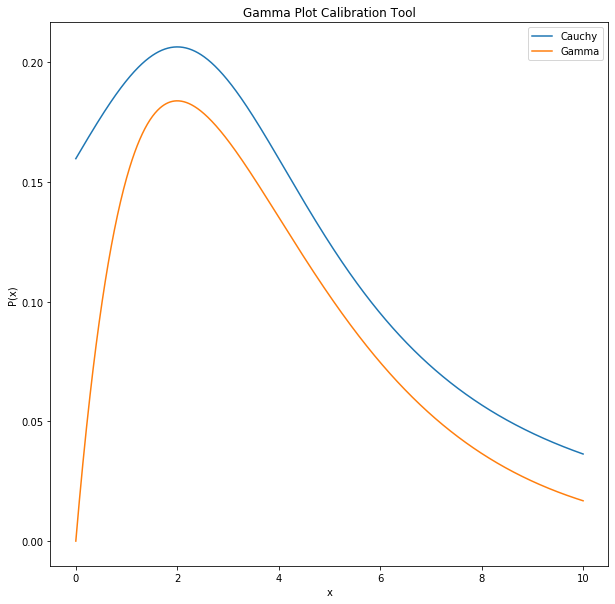

In [91]:
gammaPlotCalibrator(c=2.4,x0=2.0,γ=3.7)

In [86]:
interact(gammaPlotCalibrator,
         c=widgets.FloatSlider(min=0.1,max=10,step=0.1,value=2.4),
         x0=widgets.FloatSlider(min=-10,max=10,step=0.5,value=2.0),
         γ=widgets.FloatSlider(min=1,max=10,step=0.1,value=3.7)
         )

interactive(children=(FloatSlider(value=2.4, description='c', max=10.0, min=0.1), FloatSlider(value=2.0, descr…

<function __main__.gammaPlotCalibrator(c=1.0, x0=1.0, γ=1.0)>

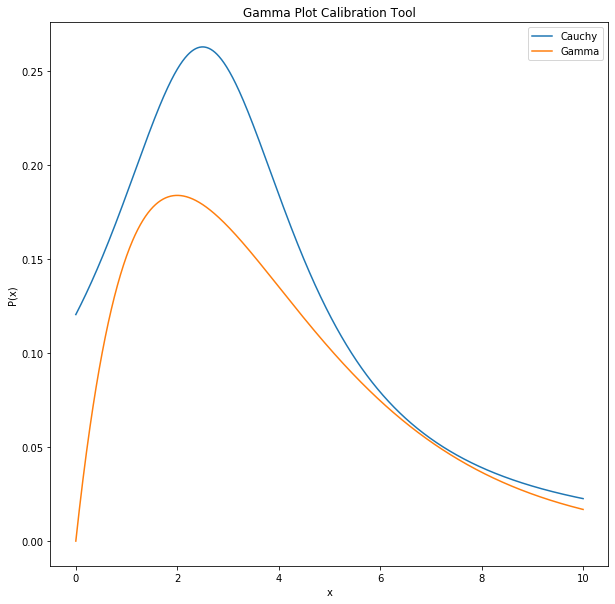

In [93]:
gammaPlotCalibrator(c=1.9,x0=2.5,γ=2.3)

Examples of when some distributions might be more favorible are seen when there is a tradeoff between quality of fit at the peak and along the tail.  Additionally, the quality of fit for values less than the mean.

## Problem 2.2

Write an acceptance-rejection sampling code that can be used to generate $n$ samples from the given Gamma PDF.  Use the code you wrote for Problem 1 to draw samples from $g_X(x)$ within your rejection sampling algorithm.


The fundamental approach is as follows, per slide 10:

1. Draw a candidate sample $y~g_x(x)$

2. Accept $y$ with probability $\frac {f(y)} {cg(y)}$, drawing a uniform sample $u~U[0,1]$

3. Implement acceptance criteria.  If $u(cg(y)) \leq f(y)$ accept $y$, otherwise reject $y$

Note that the Gamma distribution does not go negative, and as such we will only consider positive values of $x$.

In [79]:
def acceptanceTest(c=2.1,x0=2.0,γ=3.6,desiredNumberOfSamples=10000):

    nRejected = 0
    samples = []

    while len(samples) < desiredNumberOfSamples:
        # 0. Select a random number from 0 to 1, from a uniform distribution, and find the corresponding value of cgx
        rv = stats.uniform.rvs()
        y = c * inverseCDF(rv,x0=x0,γ=γ)

        fy = gammaPDF(y)

        u = stats.uniform.rvs()
        if u <= fy:
            samples.append(y)
        else:
            nRejected += 1

    rejectionStats = f"Rejected {nRejected:,} samples to produce {desiredNumberOfSamples:,} samples"

    xs = np.linspace(0,20,10000)
    gammafs = [gammaPDF(x) for x in xs]

    fig,ax = plt.subplots(figsize=(10,10))
    sns.distplot(samples,ax=ax,label="My Generator",kde=True,rug=False,hist_kws={"alpha":0.2})
    ax.plot(xs,gammafs,label="Gamma PDF",alpha=0.5)
    ax.legend()
    ax.set_title(f"Comparison of my generator and Scipy Gamma PDF\nx0:{x0}, γ={γ}, c={c}\n{rejectionStats}")
    ax.set_xlabel("x")
    ax.set_ylabel("P(x)")

## Problem 2.3

Compare the generated samples with the targeted PDF.  You can use histogram plots or available kernel density estimator codes.  Discuss your results.


C:\Users\Noah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


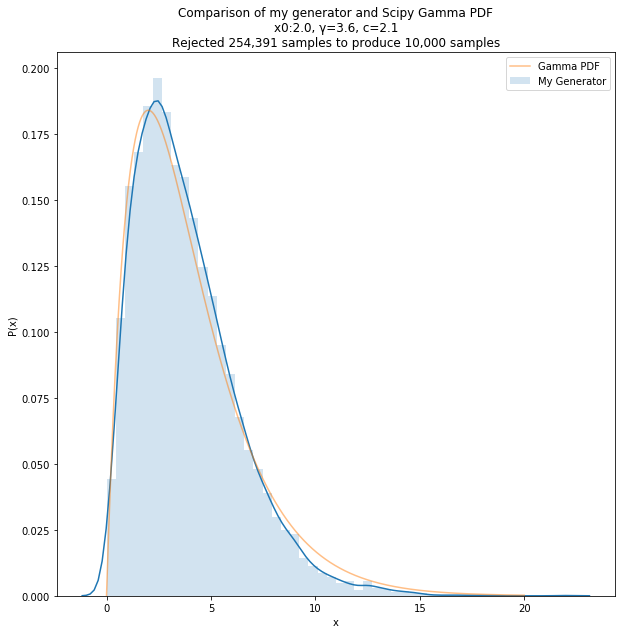

In [78]:
acceptanceTest()

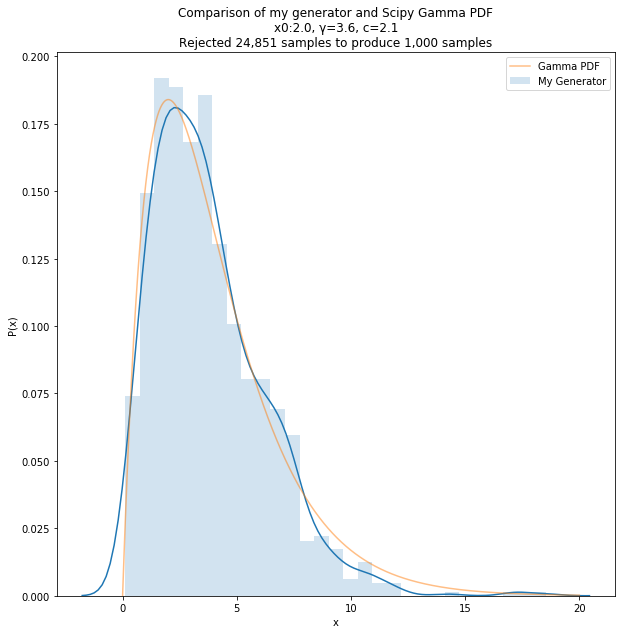

In [77]:
acceptanceTest(desiredNumberOfSamples=1000)

C:\Users\Noah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


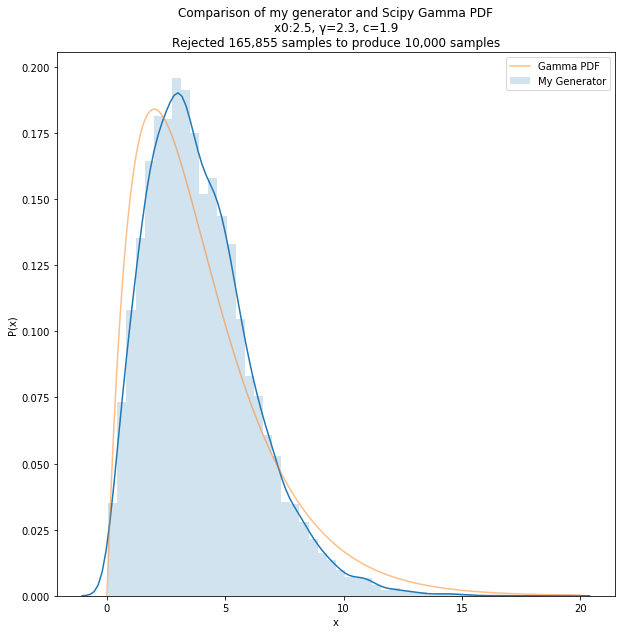

In [88]:
acceptanceTest(c=1.9,x0=2.5,γ=2.3,desiredNumberOfSamples=10000)